In [11]:
import os
import keras 
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import tensorflow as tf

import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [12]:
train_data_dir='train'
test_data_dir='test'

In [13]:
batch_size = 32
image_height = 180
image_width = 180

train_data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1.0 / 255, zoom_range=0.1, rotation_range=0.1, horizontal_flip=True
)
test_data_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0 / 255)

train_datagen = train_data_generator.flow_from_directory(
    train_data_dir, batch_size=batch_size, class_mode="binary", target_size=(image_width, image_height)
)

test_datagen = test_data_generator.flow_from_directory(
    test_data_dir, batch_size=batch_size, class_mode="binary", target_size=(image_width, image_height)
)

Found 22566 images belonging to 80 classes.
Found 6505 images belonging to 80 classes.


In [14]:
class_names=list(train_datagen.class_indices.keys())
print(class_names)

['Bear', 'Brown bear', 'Bull', 'Butterfly', 'Camel', 'Canary', 'Caterpillar', 'Cattle', 'Centipede', 'Cheetah', 'Chicken', 'Crab', 'Crocodile', 'Deer', 'Duck', 'Eagle', 'Elephant', 'Fish', 'Fox', 'Frog', 'Giraffe', 'Goat', 'Goldfish', 'Goose', 'Hamster', 'Harbor seal', 'Hedgehog', 'Hippopotamus', 'Horse', 'Jaguar', 'Jellyfish', 'Kangaroo', 'Koala', 'Ladybug', 'Leopard', 'Lion', 'Lizard', 'Lynx', 'Magpie', 'Monkey', 'Moths and butterflies', 'Mouse', 'Mule', 'Ostrich', 'Otter', 'Owl', 'Panda', 'Parrot', 'Penguin', 'Pig', 'Polar bear', 'Rabbit', 'Raccoon', 'Raven', 'Red panda', 'Rhinoceros', 'Scorpion', 'Sea lion', 'Sea turtle', 'Seahorse', 'Shark', 'Sheep', 'Shrimp', 'Snail', 'Snake', 'Sparrow', 'Spider', 'Squid', 'Squirrel', 'Starfish', 'Swan', 'Tick', 'Tiger', 'Tortoise', 'Turkey', 'Turtle', 'Whale', 'Woodpecker', 'Worm', 'Zebra']


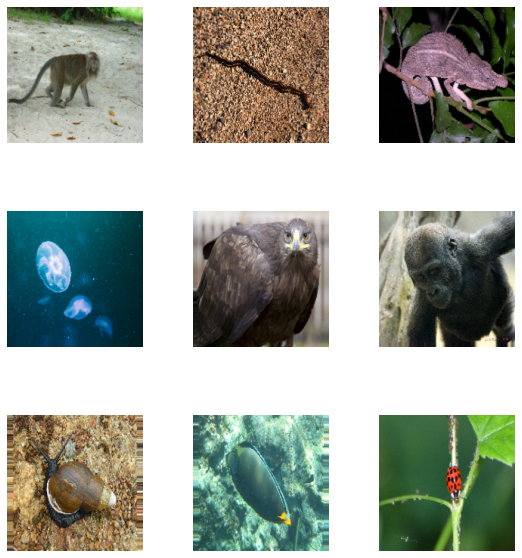

In [25]:
fig, ax = plt.subplots(3, 3, figsize=(10, 10))
fig.subplots_adjust(hspace=0.5, wspace=0.001)

# plot each image with its true label
for i in range(3):
    for j in range(3):
        # get the next batch of images and class labels
        img, label = train_datagen.next()
        
        ax[i, j].imshow(img[i])
        # plot the image and true label
        ax[i, j].axis('off')
        
plt.show()



In [16]:
import glob

# Define the desired size of the input images
IMAGE_SIZE = (image_width, image_height)

# add preprocessing layer to the front of VGG
vgg = VGG19(input_shape=IMAGE_SIZE + (3,), weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False
    
# useful for getting number of classes
folders = glob.glob('train/*') # Update this line with the correct pattern to match your folder structure

# our layers
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

In [17]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(), 
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
    metrics=["accuracy"]
)

In [18]:
epochs = 5
# Fit the model
history = model.fit(
    train_datagen,
    steps_per_epoch=(train_datagen.samples // batch_size),
    epochs=epochs,
    validation_data=test_datagen,
    validation_steps=(test_datagen.samples // batch_size),
)

Epoch 1/5


c:\Users\stpgh\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py:5582: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


705/705 [==============================] - 38932s 55s/step - loss: 3.0154 - accuracy: 0.3311 - val_loss: 3.2316 - val_accuracy: 0.3225
Epoch 2/5
705/705 [==============================] - 97259s 138s/step - loss: 2.1752 - accuracy: 0.4747 - val_loss: 3.1764 - val_accuracy: 0.3656
Epoch 3/5
705/705 [==============================] - 108651s 154s/step - loss: 1.8293 - accuracy: 0.5397 - val_loss: 3.2612 - val_accuracy: 0.3849
Epoch 4/5
705/705 [==============================] - 43193s 61s/step - loss: 1.6353 - accuracy: 0.5858 - val_loss: 3.4702 - val_accuracy: 0.3728
Epoch 5/5
705/705 [==============================] - 39420s 56s/step - loss: 1.4813 - accuracy: 0.6186 - val_loss: 3.6656 - val_accuracy: 0.3779


In [26]:
# Saving the trained model 
model.save('Animal_detection.h5')

In [19]:
epochs_range = range(epochs)

training_acc = history.history['accuracy']
validation_acc = history.history['val_accuracy']

training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Create a pd Dataframe for accuracy
acc_df = pd.DataFrame({"Training Accuracy":training_acc, "Validation Accuracy":validation_acc}, index=epochs_range)
# Create a pd Dataframe for loss
loss_df = pd.DataFrame({"Training Loss":training_loss, "Validation Loss":validation_loss}, index=epochs_range)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

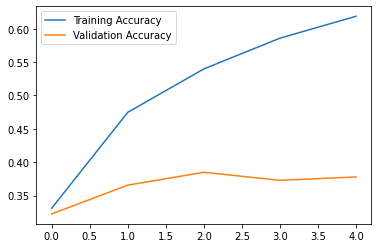

In [20]:
# Plot Accuracy
acc_df.plot()

<AxesSubplot:>

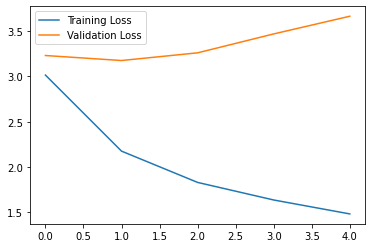

In [21]:
# plot Loss
loss_df.plot()